<a href="https://colab.research.google.com/github/SaatvikK/Hull-Uni-Work-Experience/blob/main/WorkExp_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rni

## Useful Links
---
**MNIST Database for handwriting:**<br/>
http://yann.lecun.com/exdb/mnist/

**Neural Network tutorial:**<br/>
https://www.python-course.eu/neural_network_mnist.php

In [ ]:
## Imports
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.stats import truncnorm;
import pandas as pd;

In [ ]:
## Loading Sets
ImgSize, NoLabels = 28, 10;
ImgPixels = ImgSize**2;

TrainData = np.loadtxt("/content/mnist_train_WITH_ERROR_VALS.csv", delimiter=",");
TestData = np.loadtxt("/content/mnist_test_WITH_ERROR_VALS.csv", delimiter=",");

fraction = 0.99/255;
TrainImgs = (np.asfarray(TrainData[:, 1:]) * fraction) + 0.01;
TestImgs = (np.asfarray(TestData[:, 1:]) * fraction) + 0.01;

TrainLabels = np.asfarray(TrainData[:, :1]);
TestLabels = np.asfarray(TestData[:, :1]);


In [ ]:
## One-Hot Rep
lr = np.arange(NoLabels);

# Changing labels into One-Hot form
TrainOneHot = (lr==TrainLabels).astype(np.float);
TestOneHot = (lr==TestLabels).astype(np.float);

# Using 0.01 & 0.99 instead of 1 and 0:
TrainOneHot[TrainOneHot == 0], TrainOneHot[TrainOneHot == 1] = 0.01, 0.99;
TestOneHot[TestOneHot == 0], TestOneHot[TestOneHot == 1] = 0.01, 0.99;

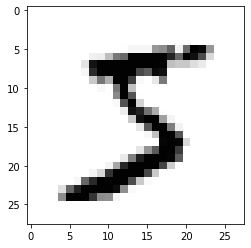

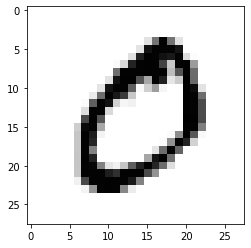

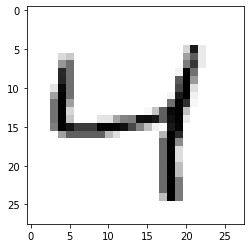

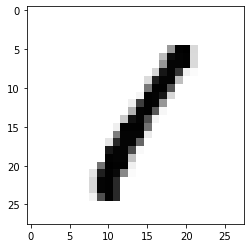

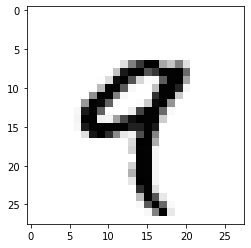

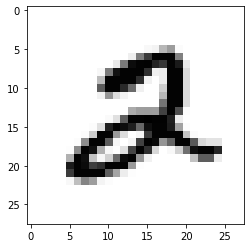

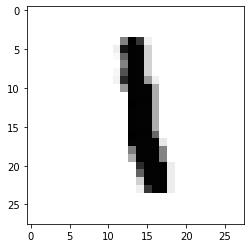

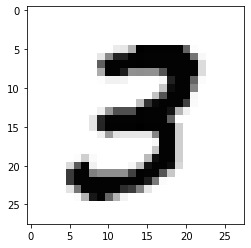

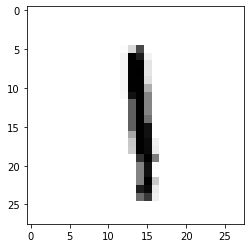

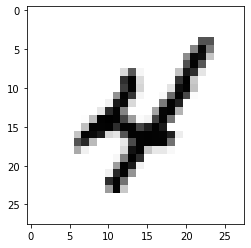

In [ ]:
## Displaying some images
for i in range(10):
    img = TrainImgs[i].reshape((ImgSize, ImgSize));
    plt.imshow(img, cmap="Greys");
    plt.show();

In [ ]:
import numpy as np;
from scipy.stats import truncnorm;

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x);
activationFunc = sigmoid;

def truncatedNorm(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)


class neuralNetwork:

    def __init__(self, InNodes, OutNodes, HiddenNodes, LearningRate):
      self.InNodes, self.OutNodes, self.HiddenNodes, self.LearningRate = InNodes, OutNodes, HiddenNodes, LearningRate;

      self.weightMatrices();

    def weightMatrices(self):
        """
        A method to initialize the weight
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.InNodes);
        x = truncatedNorm(mean = 0, sd = 1, low = -rad, upp = rad);
        self.wih = x.rvs((self.HiddeNodes, self.InNodes));
        rad = 1 / np.sqrt(self.HiddenNodes);
        x = truncatedNorm(mean=0, sd=1, low=-rad, upp=rad);
        self.who = x.rvs((self.OutNodes, self.HiddenNodes));


    def train(self, InputVector, TargetVector):
        """
        InputVector and TargetVector can
        be tuple, list or ndarray
        """

        InputVector = np.array(InputVector, ndmin=2).T
        TargetVector = np.array(TargetVector, ndmin=2).T

        OutputV1 = np.dot(self.wih, InputVector);
        OutputHidden = activationFunc(OutputV1);

        OutputV2 = np.dot(self.who, OutputHidden);
        OutputNet = activationFunc(OutputV2);

        OutputErrs = TargetVector - OutputNet;
        # update the weights:
        tmp = OutputErrs * OutputNet \
              * (1.0 - OutputNet);
        tmp = self.LearningRate  * np.dot(tmp, OutputHidden.T);
        self.who += tmp;


        # calculate hidden errors:
        HiddenErrs = np.dot(self.who.T, OutputErrs);
        # update the weights:
        tmp = HiddenErrs * OutputHidden * \
              (1.0 - OutputHidden);
        self.wih += self.LearningRate \
                          * np.dot(tmp, InputVector.T);




    def run(self, InputVector):
        # InputVector can be tuple, list or ndarray
        InputVector = np.array(InputVector, ndmin=2).T;

        OutputVector = np.dot(self.wih, InputVector);
        OutputVector = activationFunc(OutputVector);

        OutputVector = np.dot(self.who, OutputVector);
        OutputVector = activationFunc(OutputVector);

        return OutputVector;

    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int);
        for i in range(len(data_array)):
            res = self.run(data_array[i]);
            res_max = res.argmax();
            target = labels[i][0];
            cm[res_max, int(target)] += 1;
        return cm;

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label];
        return confusion_matrix[label, label] / col.sum();

    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :];
        return confusion_matrix[label, label] / row.sum();


    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0;
        for i in range(len(data)):
            res = self.run(data[i]);
            res_max = res.argmax();
            if res_max == labels[i]:
                corrects += 1;
            else:
                wrongs += 1;
        return corrects, wrongs;

In [ ]:
## Testing & Running


ANN = NeuralNetwork(no_of_in_nodes = ImgPixels,
                    no_of_out_nodes = 10,
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1);


for i in range(len(TrainImgs)):
  print("Traing img", i);
  ANN.train(TrainImgs[i], TrainOneHot[i]);


for i in range(20):
  res = ANN.run(TestImgs[i]);
  print(TestLabels[i], np.argmax(res), np.max(res));



Streaming output truncated to the last 5000 lines.
Traing img 55020
Traing img 55021
Traing img 55022
Traing img 55023
Traing img 55024
Traing img 55025
Traing img 55026
Traing img 55027
Traing img 55028
Traing img 55029
Traing img 55030
Traing img 55031
Traing img 55032
Traing img 55033
Traing img 55034
Traing img 55035
Traing img 55036
Traing img 55037
Traing img 55038
Traing img 55039
Traing img 55040
Traing img 55041
Traing img 55042
Traing img 55043
Traing img 55044
Traing img 55045
Traing img 55046
Traing img 55047
Traing img 55048
Traing img 55049
Traing img 55050
Traing img 55051
Traing img 55052
Traing img 55053
Traing img 55054
Traing img 55055
Traing img 55056
Traing img 55057
Traing img 55058
Traing img 55059
Traing img 55060
Traing img 55061
Traing img 55062
Traing img 55063
Traing img 55064
Traing img 55065
Traing img 55066
Traing img 55067
Traing img 55068
Traing img 55069
Traing img 55070
Traing img 55071
Traing img 55072
Traing img 55073
Traing img 55074
Traing img 550

In [ ]:
corrects, wrongs = ANN.evaluate(TrainImgs, TrainLabels);
print("accuracy train: ", corrects / ( corrects + wrongs));
corrects, wrongs = ANN.evaluate(TestImgs, TestLabels);
print("accuracy: test", corrects / ( corrects + wrongs));

cm = ANN.confusion_matrix(TrainImgs, TrainLabels);
print("TRAINING:\n", cm);

cm = ANN.confusion_matrix(TestImgs, TestLabels);
print("TESTING:\n", cm);

print("\n\n<<<< TESTING PRECISION & RECALL >>>>");
for i in range(10):
  print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm));

accuracy train:  0.9495833333333333
accuracy: test 0.9486
TRAINING:
 [[5785    1   36   12   11   28   28   13   15   15]
 [   0 6609   30   23   10   25   17   49   73    9]
 [   4   30 5622   72   21   14    7   58   14    6]
 [   8   30   68 5789    2   79    0   20   91   61]
 [   6   13   39    5 5385   23   10   38   19   65]
 [   6    4    2   53    1 5042   40    3   17   11]
 [  38    4   32   19   55   70 5762    9   26    4]
 [   1    7   33   29    3    2    0 5757    1   24]
 [  59   25   84   60   10   77   53   18 5504   34]
 [  16   19   12   69  344   61    1  300   91 5720]]
TESTING:
 [[ 961    0    9    2    2    6   10    3    4    2]
 [   0 1116    2    0    0    2    3   15    6    6]
 [   0    3  967    9    3    2    3   18    1    0]
 [   0    2   14  972    1   19    1   10   14   13]
 [   0    1    7    0  915    2    3    5    6    9]
 [   3    1    0    8    0  822   10    0    3    2]
 [   9    5    9    1   11   11  923    1    9    1]
 [   1    1    6   